# Here I will show you how to use the covariance comparison code and generate some cool plots!

Load some packages

In [1]:
import numpy as np
from GetDiff import FindDiff

import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
rc('text', usetex=True)
rc('text.latex', preamble=r'\usepackage{amsmath}')
rc('xtick', labelsize=18)
rc('ytick', labelsize=18)
rc('legend', fontsize=16)
rc('axes', labelsize=22)

Load the covariances

In [2]:
CompCovariance = np.loadtxt('CompressedCovariance.txt', dtype=np.float64)
CompGaussianCovariance = np.loadtxt('CompressedGaussianCovariance.txt', dtype=np.float64)

Now run the code!

In [3]:
blah = FindDiff(CompGaussianCovariance, CompCovariance, sample_size=5000)
print(blah.diff)

{'diag': (2.7, 0.5), 'corr': (7.3, 0.5)}


On to the plots! You can save it and show it to your friends.

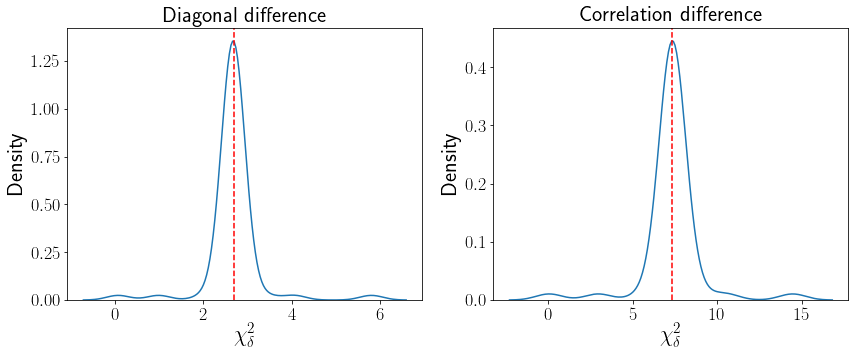

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
        
sns.kdeplot(blah.chain['diag'][:,1], ax=axes[0])
sns.kdeplot(blah.chain['corr'][:,1], ax=axes[1])
        
i=0
for k in blah.diff.keys():
    axes[i].axvline(x=blah.diff[k][0], color='red', ls='--')
    if k=='diag':
        axes[i].set_title('Diagonal difference', fontsize=22)
    elif k=='corr':
        axes[i].set_title('Correlation difference', fontsize=22)
    axes[i].set_xlabel('$\chi^2_\delta$', fontsize=22)
    i+=1
    
plt.savefig('Plots/CovDiff.pdf', dpi=400, bbox_inches='tight')